# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
import requests
import time
import random
import datetime
import gmaps

# Import API key
from config import api_key_weather,gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..\\Output\\citiesweather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def divide_chunks(list,num):
    '''
    This function divides a list into seperate lists, yielding n-sized chunks.
    This function takes in (a) a list to be split and (b) the number of instances desired per new list.
    Please note that both parameters are required.
    '''
    for i in range(0,len(list),num):
        yield list[i:i+num]
    
city_lists = list(divide_chunks(cities,60))
cities_df = DataFrame(cities)
cities_df.head()

,0
0,albany
1,iskateley
2,karkaralinsk
3,hilo
4,yellowknife


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params={"units":"imperial","appid":api_key_weather}
city_count = 1
set_count = 1
row_count = 0

print("Beginning Data Retrival\n-----------------------------")
for x in range(len(city_lists)):
    for y in range(len(city_lists[x])):
        start_time = time.time()
        params["q"] = city_lists[x][y]
        
        # assemble url and make API request
        response = requests.get(base_url,params=params).json()
              
        # extract results 
        try: 
            main = response["main"]
            coord = response["coord"]
            
            print(f"Processing Record {city_count} of Set {set_count} | {city_lists[x][y]}")
            cities_df.loc[row_count,'City'] = response.get("name",'')
            cities_df.loc[row_count,'Cloudiness'] = response["clouds"].get("all",'')
            cities_df.loc[row_count,'Country'] = response["sys"].get("country",'')
            cities_df.loc[row_count,'Country Date'] = response.get("dt",'')
            cities_df.loc[row_count,'Humidity'] = main.get("humidity",'')
            cities_df.loc[row_count,'Lat'] = coord.get("lat",'')     
            cities_df.loc[row_count,'Lng'] = coord.get('lon','')
            cities_df.loc[row_count,'Max Temp'] = main.get("temp_max",'')
            cities_df.loc[row_count,'Wind Speed'] = response["wind"].get("speed",'')
            row_count += 1
        
        except KeyError:
            print(f"{city_lists[x][y]} not found. Skipping...")
                  
        city_count += 1 
                  
    time.sleep(60)   
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"set {set_count} took {elapsed} seconds")
    set_count += 1
    city_count = 1
    
print(f"-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | iskateley
karkaralinsk not found. Skipping...
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | samarai
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | port alfred
taolanaro not found. Skipping...
Processing Record 13 of Set 1 | taunggyi
Processing Record 14 of Set 1 | hualmay
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | batemans bay
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | eureka
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | cahors
Processing Record 22 of Set 1 | lom sak
Processing Record 23 of Set 1 | bambous virieux
Processing Re

Processing Record 22 of Set 4 | melita
sentyabrskiy not found. Skipping...
Processing Record 24 of Set 4 | tadepallegudem
Processing Record 25 of Set 4 | chuy
Processing Record 26 of Set 4 | leshukonskoye
Processing Record 27 of Set 4 | puerto baquerizo moreno
Processing Record 28 of Set 4 | beidao
Processing Record 29 of Set 4 | grimshaw
Processing Record 30 of Set 4 | kabinda
Processing Record 31 of Set 4 | sitka
haibowan not found. Skipping...
Processing Record 33 of Set 4 | ibra
Processing Record 34 of Set 4 | vila velha
Processing Record 35 of Set 4 | quimper
Processing Record 36 of Set 4 | mar del plata
Processing Record 37 of Set 4 | nongstoin
Processing Record 38 of Set 4 | rizhao
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | longyearbyen
Processing Record 41 of Set 4 | muros
Processing Record 42 of Set 4 | spasskoye
Processing Record 43 of Set 4 | bandarbeyla
Processing Record 44 of Set 4 | miyako
Processing Record 45 of Set 4 | cherskiy
Processing Rec

Processing Record 43 of Set 7 | komsomolskiy
Processing Record 44 of Set 7 | itacare
Processing Record 45 of Set 7 | joshimath
Processing Record 46 of Set 7 | lincoln
fort saint john not found. Skipping...
Processing Record 48 of Set 7 | tateyama
Processing Record 49 of Set 7 | saint-augustin
Processing Record 50 of Set 7 | hirado
Processing Record 51 of Set 7 | grand island
Processing Record 52 of Set 7 | mehamn
Processing Record 53 of Set 7 | nusaybin
Processing Record 54 of Set 7 | kjopsvik
Processing Record 55 of Set 7 | sept-iles
Processing Record 56 of Set 7 | ulaangom
Processing Record 57 of Set 7 | xingyi
Processing Record 58 of Set 7 | mao
akyab not found. Skipping...
Processing Record 60 of Set 7 | manokwari
set 7 took 60.236876010894775 seconds
Processing Record 1 of Set 8 | livenka
Processing Record 2 of Set 8 | pilcaya
Processing Record 3 of Set 8 | cam ranh
Processing Record 4 of Set 8 | ozinki
Processing Record 5 of Set 8 | north platte
Processing Record 6 of Set 8 | nam

Processing Record 1 of Set 11 | znamenskoye
karauzyak not found. Skipping...
Processing Record 3 of Set 11 | kamenka
Processing Record 4 of Set 11 | lazarev
Processing Record 5 of Set 11 | preobrazheniye
Processing Record 6 of Set 11 | falam
Processing Record 7 of Set 11 | santiago del estero
Processing Record 8 of Set 11 | am timan
jibuti not found. Skipping...
Processing Record 10 of Set 11 | oranjestad
Processing Record 11 of Set 11 | soyo
Processing Record 12 of Set 11 | rawicz
Processing Record 13 of Set 11 | nara
Processing Record 14 of Set 11 | dinganen
Processing Record 15 of Set 11 | singarayakonda
Processing Record 16 of Set 11 | acapulco
Processing Record 17 of Set 11 | luganville
Processing Record 18 of Set 11 | general roca
Processing Record 19 of Set 11 | yantzaza
Processing Record 20 of Set 11 | nipawin
Processing Record 21 of Set 11 | zonguldak
Processing Record 22 of Set 11 | lubbock
Processing Record 23 of Set 11 | cabo san lucas
Processing Record 24 of Set 11 | carup

In [14]:
cities_df.drop([0],axis=1,inplace=True)
cities_df.dropna(inplace=True)
cities_df_type = cities_df.astype({"Cloudiness": int, "Country Date": int,"Humidity": int})

KeyError: '[0] not found in axis'

In [6]:
cities_df_type = cities_df.astype({"Cloudiness": int, "Country Date": int,"Humidity": int})
cities_df_type.head()

,City,Cloudiness,Country,Country Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,75,US,1552902601,63,42.65,-73.75,28.00,6.93
1,Iskateley,0,RU,1552902725,88,67.68,53.15,26.04,13.13
2,Hilo,90,US,1552902675,68,19.71,-155.08,70.00,8.05
3,Yellowknife,5,CA,1552902531,85,62.45,-114.38,26.01,5.82
4,Samarai,92,PG,1552902726,100,-10.62,150.67,79.14,7.65


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df_type.to_csv(output_data_file, encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

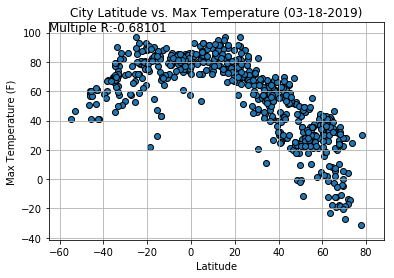

In [8]:
x_axis = cities_df_type["Lat"]
y_axis = cities_df_type["Max Temp"]
corr = round(x_axis.corr(y_axis),5)

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid(b=True)
plt.title(f"City Latitude vs. Max Temperature ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.text(min(x_axis)-10,max(y_axis)+4,f"Multiple R:{corr}",fontsize=12)
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig("..\\Output\\latvtemp.png")

#### Latitude vs. Humidity Plot

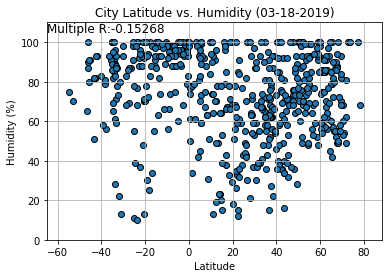

In [9]:
y_axis = cities_df["Humidity"]
corr = round(x_axis.corr(y_axis),5)

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid(b=True)
plt.title(f"City Latitude vs. Humidity ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.text(min(x_axis)-10,max(y_axis)+5,f"Multiple R:{corr}",fontsize=12)
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig("..\\Output\\latvhumd.png")

#### Latitude vs. Cloudiness Plot

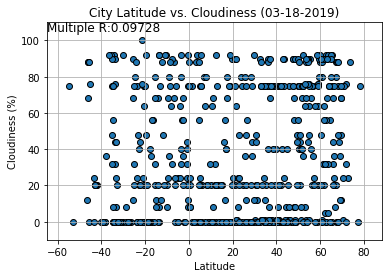

In [10]:
y_axis = cities_df_type["Cloudiness"]
corr = round(x_axis.corr(y_axis),5)

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid(b=True)
plt.title(f"City Latitude vs. Cloudiness ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(min(x_axis)-10,max(y_axis)+5,f"Multiple R:{corr}",fontsize=12)
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig("..\\Output\\latvcloud.png")

#### Latitude vs. Wind Speed Plot

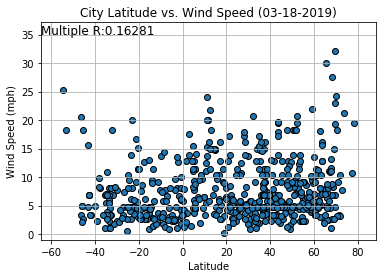

In [11]:
y_axis = cities_df_type["Wind Speed"]
corr = round(x_axis.corr(y_axis),5)

plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylim(-1,max(y_axis)+5)
plt.grid(b=True)
plt.title(f"City Latitude vs. Wind Speed ({datetime.datetime.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(min(x_axis)-10,max(y_axis+3),f"Multiple R:{corr}",fontsize=12)
plt.scatter(x_axis,y_axis,edgecolors='k')
plt.savefig("..\\Output\\latvwind.png")

<function matplotlib.pyplot.show(*args, **kw)>

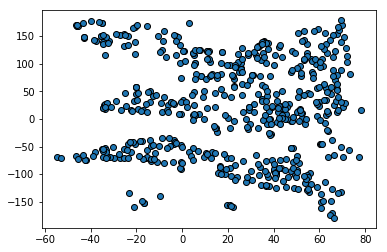

In [12]:
lat_here = cities_df_type["Lat"]
lng_here = cities_df_type["Lng"]

plt.scatter(lat_here,lng_here,edgecolors='k')
plt.show

In [13]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

# Create symbol layer
locations = cities_df_type[["Lat", "Lng"]].astype(float)
cities_layer = gmaps.symbol_layer(
    locations, fill_color='black', scale=2)

fig = gmaps.figure()
fig.add_layer(cities_layer)

fig
#Download as png with button below

Figure(layout=FigureLayout(height='420px'))